### Final Project : Implementing Girvan-Newman Algorithm

#### 1.1 Generating the testbed (4 groups of nodes with 32 members each)
The groups are notated by the number mod 4. For example, 5 and 17 are in group 1, and 22 and 26 are in group 2, and on.


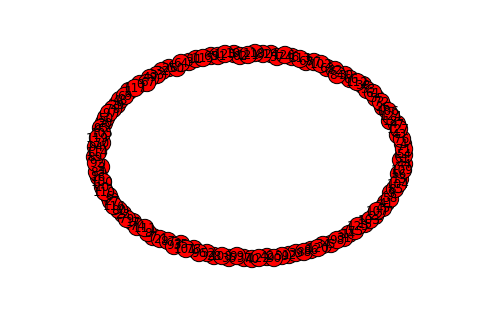

In [104]:
#Import Libraries
%matplotlib inline
import networkx
import matplotlib.pyplot as plt

#Specify the number of nodes you want in the network
N = 128

#Define the function that will create the undirected network of nodes,.
#
def create_graph(n):
    #Consider regular graph
    g = networkx.Graph()

    #Add the nodes
    for i in range(n) : 
        g.add_node(i)
        
    return g
    
G = create_graph(N)
#Plot the graph
networkx.draw(G,with_labels=True)
plt.show()    

#### 1.2 Adding the links

Links are drawn at random, but average number of links going from one node to others in its own community and
number of links going from one node to rest of the network are set. The number always adds up to 16

In [105]:
from random import randint
import random

# Add random links as necessary
def add_random_links(g, z_in) :
    degreesum = 16
    
    z_out = degreesum - z_in
    g = add_samegroup_links(g, z_in)
    g = add_diffgroup_links(g,z_out)
        
    return g

# Add edges between samegroup    
def add_samegroup_links(g, z_in) : 
    n = len(g.nodes())
    m = n / 4
    inedges = []
    total_samegroup_links = 0    
    
    while (total_samegroup_links < z_in * n /2 ) : 
            [a,b] = random.sample(set(range(m)),2)
            c = randint(0,3)
            
            #b is always greater than a
            if a > b :
                a, b = b, a
            
            aVal = 4*a + c
            bVal = 4*b + c
            
            if (not ((aVal, bVal) in inedges)):
                g.add_edge(aVal,bVal)
                inedges.append((aVal,bVal))
                total_samegroup_links += 1
                
    return g


# Add edges between different group
def add_diffgroup_links(g,z_out) : 
    n = len(g.nodes())
    m = n / 4
    outedges = []
    total_diffgroup_links = 0
    
    while (total_diffgroup_links < z_out * n /2 ) : 
            a = randint(0,m-1)
            b = randint(0,m-1)
            [c,d] = random.sample(set(range(4)),2)
            
            aVal = 4*a + c
            bVal = 4*b + d
            
            #bVal is always greater than aVal
            if aVal > bVal :
                aVal, bVal = bVal, aVal
            
            if (not ((aVal, bVal) in outedges)):
                g.add_edge(aVal,bVal)
                outedges.append((aVal,bVal))
                total_diffgroup_links += 1
    return g
    

1024
128
16


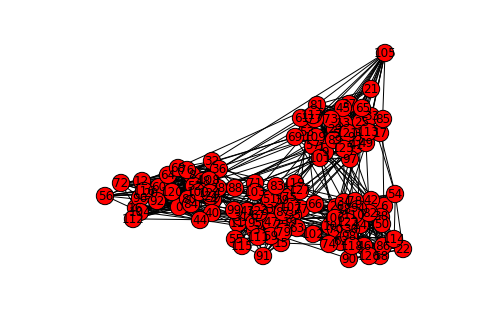

In [106]:
# Add random_links to G with Z_in average degree between 
G = add_random_links(G,14)

networkx.draw(G,with_labels=True)

ed = G.number_of_edges()
no = G.number_of_nodes()

print ed
print no
print (2*ed/no)

#### 2.1 Girvan Newman Algorithm

Each iteration consits of :
    
    1. Calculate betweenness of all edges 
    2. Remove edge with highest betweenness
We Repeat until we have 4 classes



In [121]:
def gnAlgorithm(g):
    while networkx.number_connected_components(g) < 4 : 
        betweenness = networkx.edge_betweenness_centrality(g)
        #Remove the edge with maximum betweenness
        max_edge = max(betweenness, key=lambda i:betweenness[i])
        g.remove_edge(max_edge[0],max_edge[1])
        
    return g

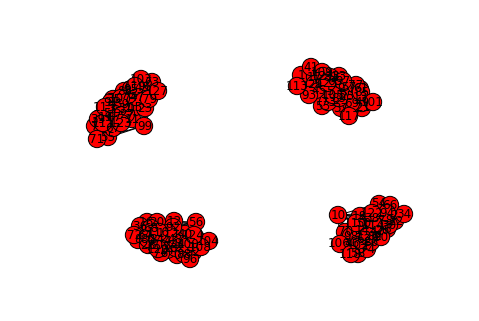

In [122]:
G = gnAlgorithm(G)

networkx.draw(G,with_labels=True)

#### 3.1 Find optimal matching

Find optimal classification that gives the best result


In [128]:
import itertools

def find_Optimal_Classification_Score(g):
    #The componets we are intersted in
    components = sorted(networkx.connected_components(G), key = len, reverse=True)    
    print components
    
    bestScore = 0
    bestSubset = []
    
    rem = [0,1,2,3]
    for subset in itertools.permutations(rem, 4):
        score = 0
        
        for i in range(4):
            comp = components[i]
            
            for elem in comp : 
                if elem % 4 == subset[i] :
                    score += 1
    
        
        if score > bestScore :
            bestScore = score
            bestSubset = subset
        
    print bestScore
    print bestSubset
    
    return float(bestScore) / len(G.nodes())

In [129]:
score = find_Optimal_Classification_Score(G)
print score

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], [48], [97]]


IndexError: list index out of range

#### 4.1 Compare Results
Check results for different values of z_in

In [130]:
scores = []
z_inVals = range(17)

for i in range(17):
    print "Processing : "
    print i
    G = create_graph(128)
    G = add_random_links(G,i)
    G = gnAlgorithm(G)
    score = find_Optimal_Classification_Score(G)
    scores.append(score)

Processing : 
0
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], [51], [98], [112]]
35
(1, 3, 2, 0)
Processing : 
1
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106

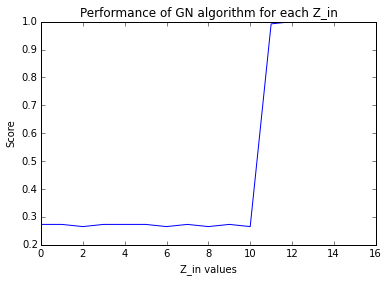

In [133]:
plt.plot(z_inVals, scores)
plt.title("Performance of GN algorithm for each Z_in")
plt.xlabel('Z_in values')
plt.ylabel('Score')